# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - myeloids - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240509

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import numpy as np
            #import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats
import muon as mu
from muon import atac as ac
from muon import prot

In [2]:
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [3]:
input = '/home/acirnu/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_myeloids+lymphoids_leiden_clustered_muon_ac240507.raw.h5mu'
mdata_data = mu.read_h5mu(input) 
mdata_data

MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification', 'lineage'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [4]:
adata = mdata_data.mod["rna"]
adata

AnnData object with n_obs × n_vars = 44586 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification', 'lineage'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    uns: 'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs

,cell_source,donor,n_counts,sample,seed_labels,condition,genotype,infection,library,model,...,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,batch,C_scANVI,leiden,classification,lineage
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,DOCK4+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.019995,-0.083225,6,1,reference,DOCK4+MØ,3,DOCK4+MØ_3,myeloid
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.169221,-0.390143,6,4,reference,Monocytes,3,DOCK4+MØ_3,myeloid
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.317631,-0.578955,7,4,reference,Monocytes,6,Monocytes_6,myeloid
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.370103,-0.370084,7,2,reference,LYVE1+MØ,2,LYVE1+MØ_2,myeloid
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.142503,-0.357287,7,2,reference,LYVE1+MØ,2,LYVE1+MØ_2,myeloid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,AG_Gerull,Ttn_HetKO_MCMV_1,12119.0,Ttn_HetKO_MCMV_1,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,0.0,-0.267751,-0.531946,25,5,query,B,9,B_9,lymphoid
TTTGGAGAGATTAGCA-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,20506.0,Ttn_Ctr_MCMV_2,Unknown,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,...,23.0,2.905558,0.470866,21,5,query,B,2,B_2,lymphoid
TTTGGTTAGCACCTGC-1-B2,AG_Gerull,Ttn_HetKO_MCMV_2,3174.0,Ttn_HetKO_MCMV_2,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,0.0,0.000996,-0.736926,26,5,query,CD8,7,CD8_7,lymphoid
TTTGTTGAGACCTCCG-1-B2,AG_Gerull,Ttn_HetKO_noninf_2,4549.0,Ttn_HetKO_noninf_2,Unknown,Ttn_HetKO_noninf,Ttn_HetKO,noninf,B2,Ttn,...,0.0,-0.428444,-0.362500,29,5,query,B,13,B_13,lymphoid


In [6]:
new_order_genotype = ['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO']
adata.obs["genotype"] = adata.obs["genotype"].cat.reorder_categories(new_order_genotype, ordered=True)

adata.obs["genotype"].cat.categories

Index(['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO'], dtype='object')

In [7]:
new_order_infection = ['noninf', 'MCMV']
adata.obs["infection"] = adata.obs["infection"].cat.reorder_categories(new_order_infection, ordered=True)

adata.obs["infection"].cat.categories

Index(['noninf', 'MCMV'], dtype='object')

In [8]:
new_order_condition = ['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV', 'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf','Ttn_Ctr_MCMV', 'Ttn_HetKO_MCMV' ]
adata.obs["condition"] = adata.obs["condition"].cat.reorder_categories(new_order_condition, ordered=True)

adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV',
       'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf', 'Ttn_Ctr_MCMV',
       'Ttn_HetKO_MCMV'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [9]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="classification",
    sample_identifier="sample",
    covariate_obs=["condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 44616 × 29414
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification', 'lineage'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    coda:	30 x 36
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'

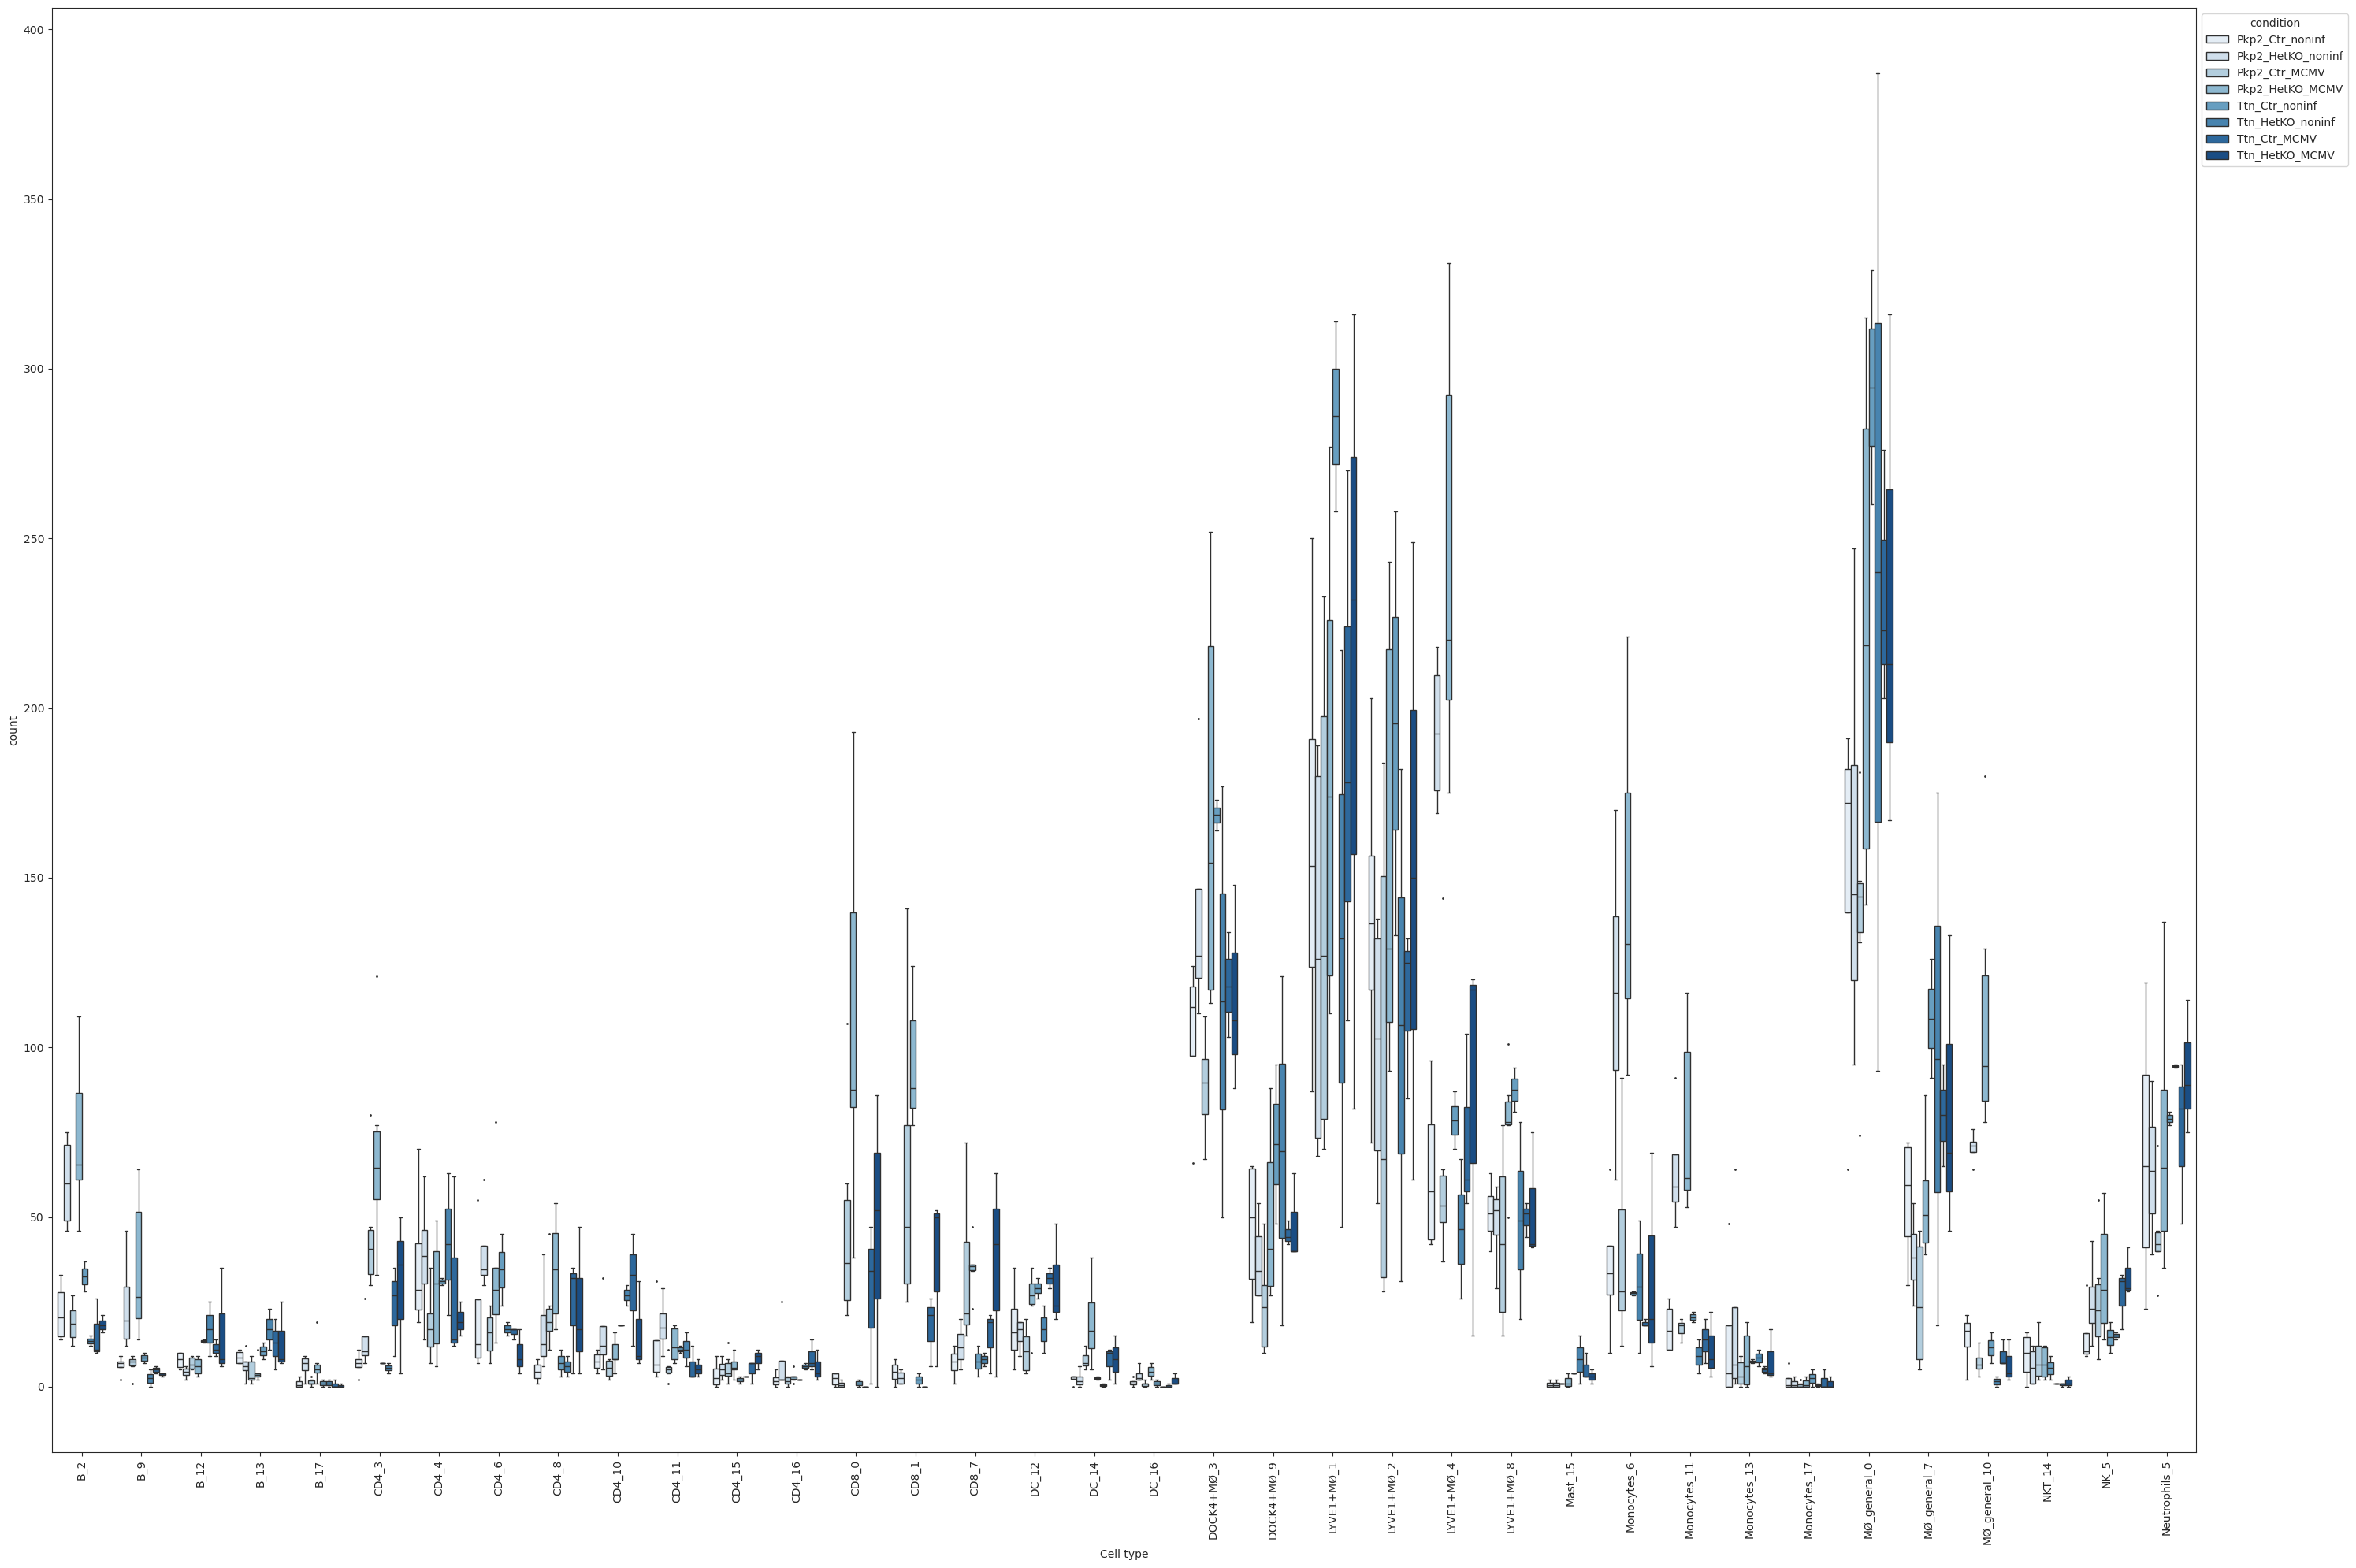

In [10]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="condition",
    y_scale="count",
    figsize=(30, 20),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

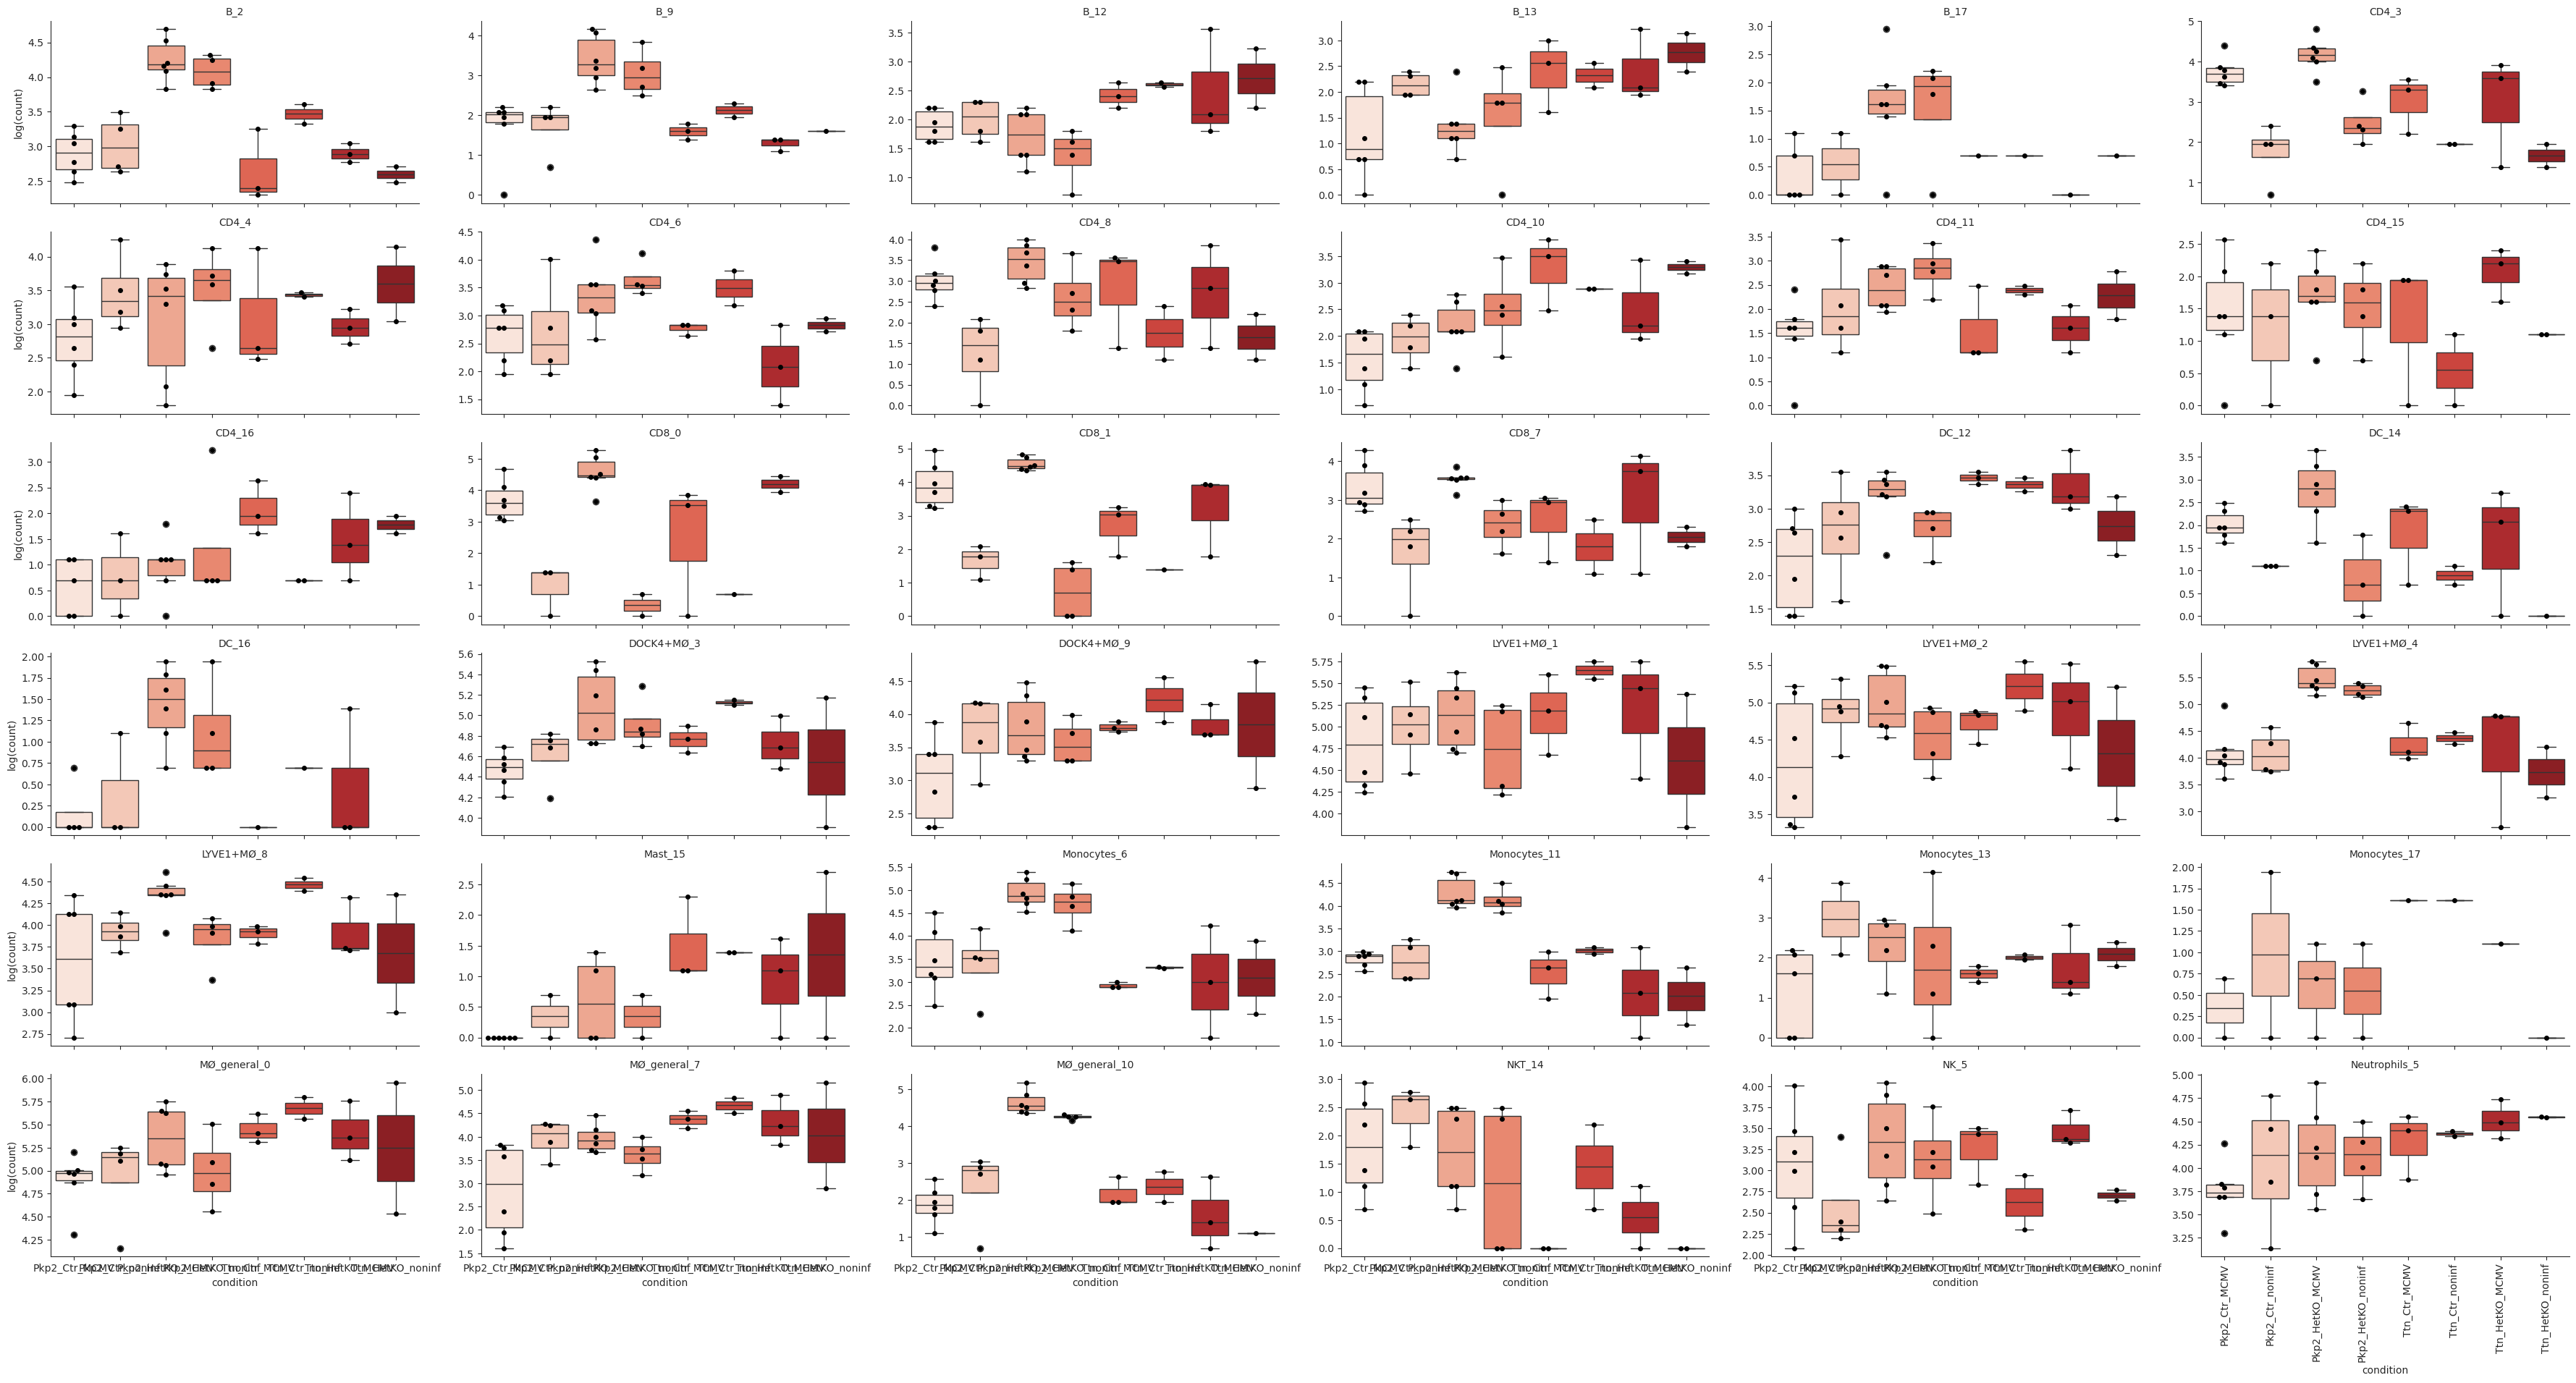

In [11]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="condition",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.xticks(rotation=90)
plt.show()

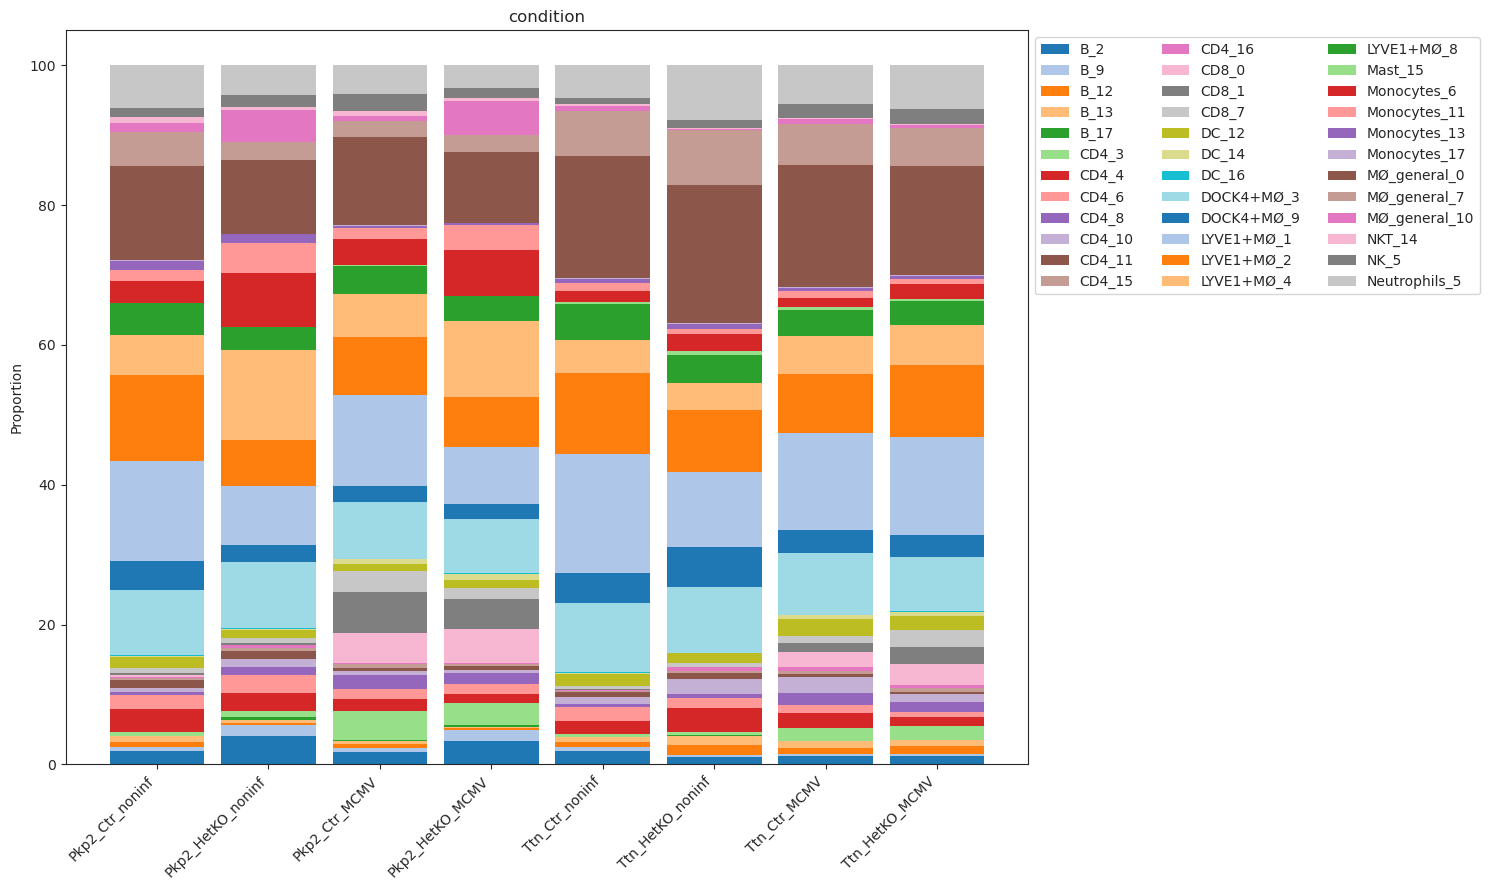

In [12]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="condition", figsize=(15, 9) 
)
plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [13]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="condition",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

Automatic reference selection! Reference cell type set to CD4_15

Zero counts encountered in data! Added a pseudocount of 0.5.

AnnData object with n_obs × n_vars = 30 × 36
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

Run No-U-turn HMC sampling (nuts)

In [14]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
sample: 100%|██████████| 11000/11000 [13:29<00:00, 13.59it/s, 511 steps of size 8.66e-03. acc. prob=0.88]


In [15]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 30 × 36
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_condition[T.Pkp2_HetKO_noninf]', 'effect_df_condition[T.Pkp2_Ctr_MCMV]', 'effect_df_condition[T.Pkp2_HetKO_MCMV]', 'effect_df_condition[T.Ttn_Ctr_noninf]', 'effect_df_condition[T.Ttn_HetKO_noninf]', 'effect_df_condition[T.Ttn_Ctr_MCMV]', 'effect_df_condition[T.Ttn_HetKO_MCMV]'

#### Result interpreteation

**Intercepts**

The first column of the intercept summary shows the parameters determined by the MCMC inference.

The “Expected sample” column gives some context to the numerical values. If we had a new sample (with no active covariates) with a total number of cells equal to the mean sampling depth of the dataset, then this distribution over the cell types would be most likely.

**Effects**

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

Since the numerical values of the “Final Parameter” column are not straightforward to interpret, the “Expected sample” and “log2-fold change” columns give us an idea on the magnitude of the change. The expected sample is calculated for each covariate separately (covariate value = 1, all other covariates = 0), with the same method as for the intercepts. The log-fold change is then calculated between this expected sample and the expected sample with no active covariates from the intercept section. Since the data is compositional, cell types for which no credible change was detected, can still change in abundance as well, as soon as a credible effect is detected on another cell type due to the sum-to-one constraint. If there are no credible effects for a covariate, its expected sample will be identical to the intercept sample, therefore the log2-fold change is 0.

In [16]:
sccoda_model.summary(sccoda_data, modality_key= "coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 30 samples, 36 cell types                                    │
│ Reference cell type                        │ CD4_15                                                             │
│ Formula                                    │ condition                                                          │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                Final Parameter  Expected Sample                                                                 │
│ Cell Type                                                                                                       │
│ B_2                 1.406           27.956                                                                      │
│ B_9                 0.372            9.941                                                                      │
│ B_12                0.658           13.232                                                                      │
│ B_13                0.586           12.313                                                                      │
│ B_17               -0.479            4.245                                                                      │
│ CD4_3               0.899           16.838                                                                      │
│ CD4_4               1.599           33.908                                                                      │
│ CD4_6               1.323           25.730                                                                      │
│ CD4_8               0.742           14.392                                                                      │
│ CD4_10              0.927           17.316                                                                      │
│ CD4_11              0.602           12.511                                                                      │
│ CD4_15              0.166            8.090                                                                      │
│ CD4_16             -0.057            6.473                                                                      │
│ CD8_0               0.206            8.420                                                                      │
│ CD8_1               0.439           10.630                                                                      │
│ CD8_7               0.808           15.373                                                                      │
│ DC_12               1.365           26.833                                                                      │
│ DC_14              -0.006            6.812                                                                      │
│ DC_16              -0.500            4.156                                                                      │
│ DOCK4+MØ_3          3.080          149.103                                                                      │
│ DOCK4+MØ_9          2.057           53.605                                                                      │
│ LYVE1+MØ_1          3.372          199.665                                                                      │
│ LYVE1+MØ_2          3.072          147.915                                                                      │
│ LYVE1+MØ_4          2.500           83.483                                                                      │
│ LYVE1+MØ_8          2.296           68.077                                                                      │
│ Mast_15            -0.388            4.649                                                                      │
│ Monocytes_6         1.639           35.291                                                                      │
│ Monocytes_11        1.139           21.405                                                                      │
│ Monocytes_13        0.288            9.140                                                                      │
│ Monocytes_17       -0.660            3.542            

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                             Final Parameter  Expected Sample  log2-fold change                  │
│ Covariate                    Cell Type                                                                          │
│ conditionT.Pkp2_HetKO_noninf B_2                 0.978           57.222             1.033                       │
│                              B_9                 0.996           20.727             1.060                       │
│                              B_12                0.000           10.187            -0.377                       │
│                              B_13                0.000            9.479            -0.377                       │
│                              B_17                0.000            3.268            -0.377                       │
│                              CD4_3               0.000           12.963            -0.377                       │
│                              CD4_4               0.000           26.104            -0.377                       │
│                              CD4_6               0.665           38.513             0.582                       │
│                              CD4_8               0.000           11.079            -0.377                       │
│                              CD4_10              0.000           13.331            -0.377                       │
│                              CD4_11              0.000            9.632            -0.377                       │
│                              CD4_15              0.000            6.228            -0.377                       │
│                              CD4_16              0.000            4.983            -0.377                       │
│                              CD8_0              -0.764            3.021            -1.479                       │
│                              CD8_1               0.000            8.183            -0.377                       │
│                              CD8_7               0.000           11.835            -0.377                       │
│                              DC_12               0.000           20.657            -0.377                       │
│                              DC_14               0.000            5.244            -0.377                       │
│                              DC_16               0.000            3.200            -0.377                       │
│                              DOCK4+MØ_3          0.000          114.786            -0.377                       │
│                              DOCK4+MØ_9          0.000           41.267            -0.377                       │
│                              LYVE1+MØ_1          0.000          153.710            -0.377                       │
│                              LYVE1+MØ_2          0.000          113.871            -0.377                       │
│                              LYVE1+MØ_4          1.069          187.247             1.165                       │
│                              LYVE1+MØ_8          0.000           52.409            -0.377                       │
│                              Mast_15             0.000            3.579            -0.377                       │
│                              Monocytes_6         1.362          106.115             1.588                       │
│                              Monocytes_11        1.289           59.802             1.482                       │
│                              Monocytes_13        0.000            7.036            -0.377                       │
│                              Monocytes_17        0.000

### Filter out credible effects

In [17]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate                       Cell Type    
condition[T.Pkp2_HetKO_noninf]  B_2               True
                                B_9               True
                                B_12             False
                                B_13             False
                                B_17             False
                                                 ...  
condition[T.Ttn_HetKO_MCMV]     MØ_general_7     False
                                MØ_general_10    False
                                NKT_14           False
                                NK_5             False
                                Neutrophils_5    False
Name: Final Parameter, Length: 252, dtype: bool

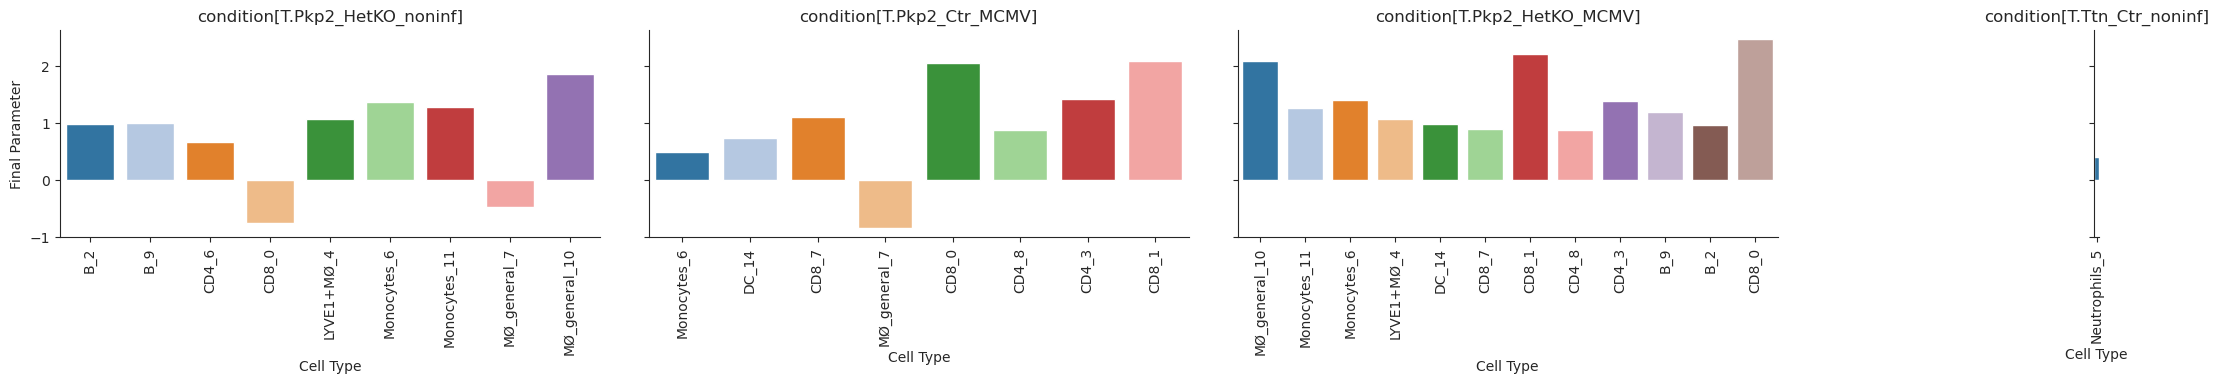

In [18]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key="coda", parameter="Final Parameter")

##### Adjust the "false discovery rate"

In [19]:
sccoda_data

MuData object with n_obs × n_vars = 44616 × 29414
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification', 'lineage'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    coda:	30 x 36
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_condition[T.Pkp2_HetKO_noninf]', 'effect_df_condition[T.Pkp2_Ctr_MCMV]', 'effect_df_condition[T.Pkp2_HetKO_MCMV]', 'effect_df_condition[T.Ttn_Ctr_noninf]', 'effect_df_condition[T.Ttn_HetKO_noninf]', 'effect_df_condition[T.Ttn_Ctr_MCMV]', 'effect_df_condition[T.Ttn_HetKO_MCMV]'

In [20]:
sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_noninf]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_2,0.977868,0.511,1.416,0.236,0.9994,57.221980,1.033402
B_9,0.996390,0.328,1.640,0.390,0.9579,20.727483,1.060124
B_12,0.000000,-1.182,0.243,0.376,0.5402,10.186569,-0.377364
B_13,0.000000,-1.099,0.351,0.302,0.4304,9.478917,-0.377364
B_17,0.000000,-0.264,1.427,0.455,0.6133,3.267647,-0.377364
CD4_3,0.000000,-0.561,0.641,0.187,0.3478,12.962624,-0.377364
CD4_4,0.000000,-0.116,0.794,0.240,0.4999,26.103519,-0.377364
CD4_6,0.664914,0.121,1.160,0.325,0.8916,38.512539,0.581904
CD4_8,0.000000,-0.277,0.984,0.288,0.4651,11.079207,-0.377364


In [21]:
sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_MCMV]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_2,0.974127,0.569,1.348,0.193,1.0000,48.726967,0.801553
B_9,1.190357,0.630,1.714,0.280,0.9986,21.508812,1.113507
B_12,0.000000,-1.158,0.108,0.345,0.4916,8.706809,-0.603816
B_13,0.000000,-1.350,0.032,0.432,0.6310,8.101955,-0.603816
B_17,0.000000,-0.188,1.335,0.434,0.5903,2.792969,-0.603816
CD4_3,1.392678,0.963,1.802,0.216,1.0000,44.602214,1.405394
CD4_4,0.000000,-0.775,0.096,0.218,0.4079,22.311570,-0.603816
CD4_6,0.000000,-0.125,0.755,0.200,0.3715,16.930307,-0.603816
CD4_8,0.876168,0.338,1.392,0.298,0.9752,22.743363,0.660227


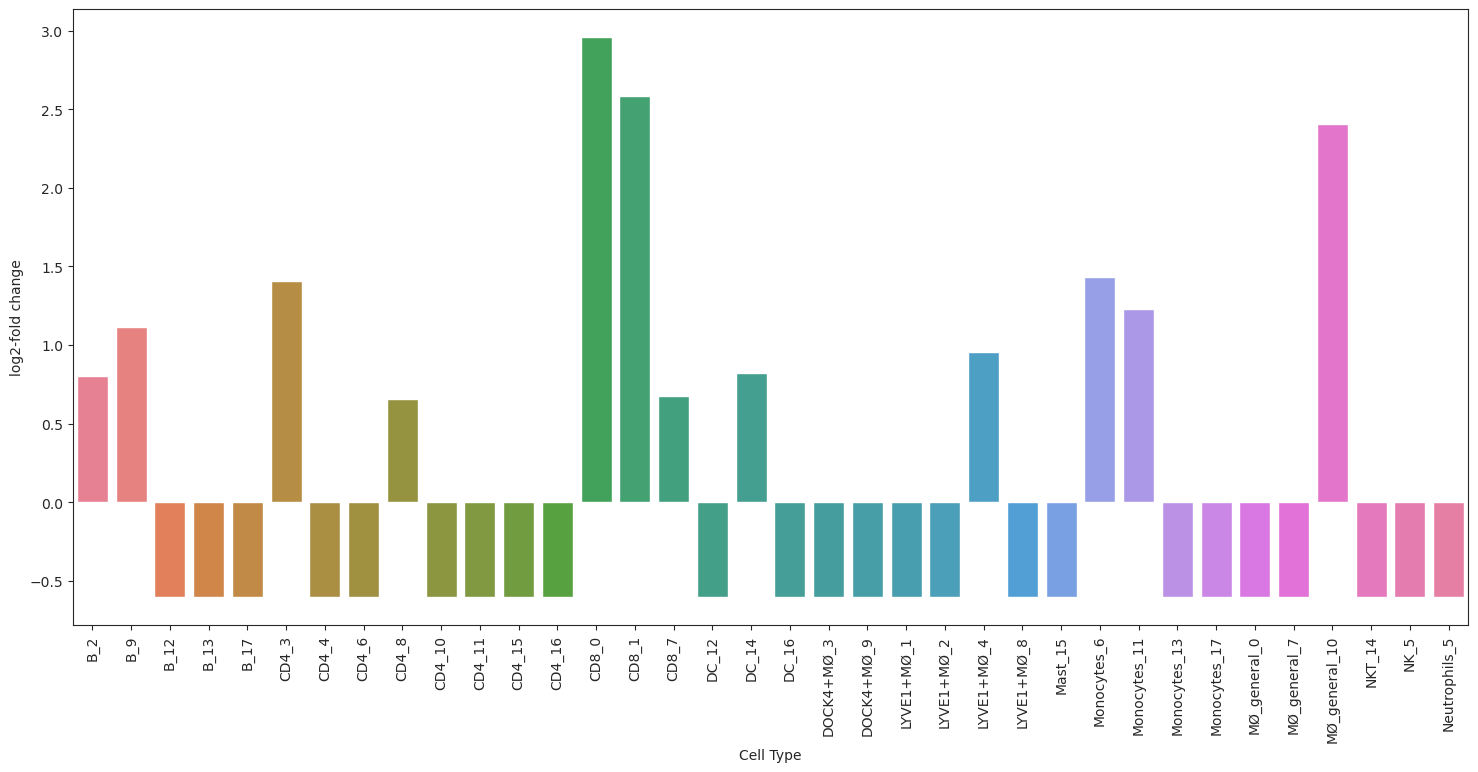

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_MCMV]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.show()

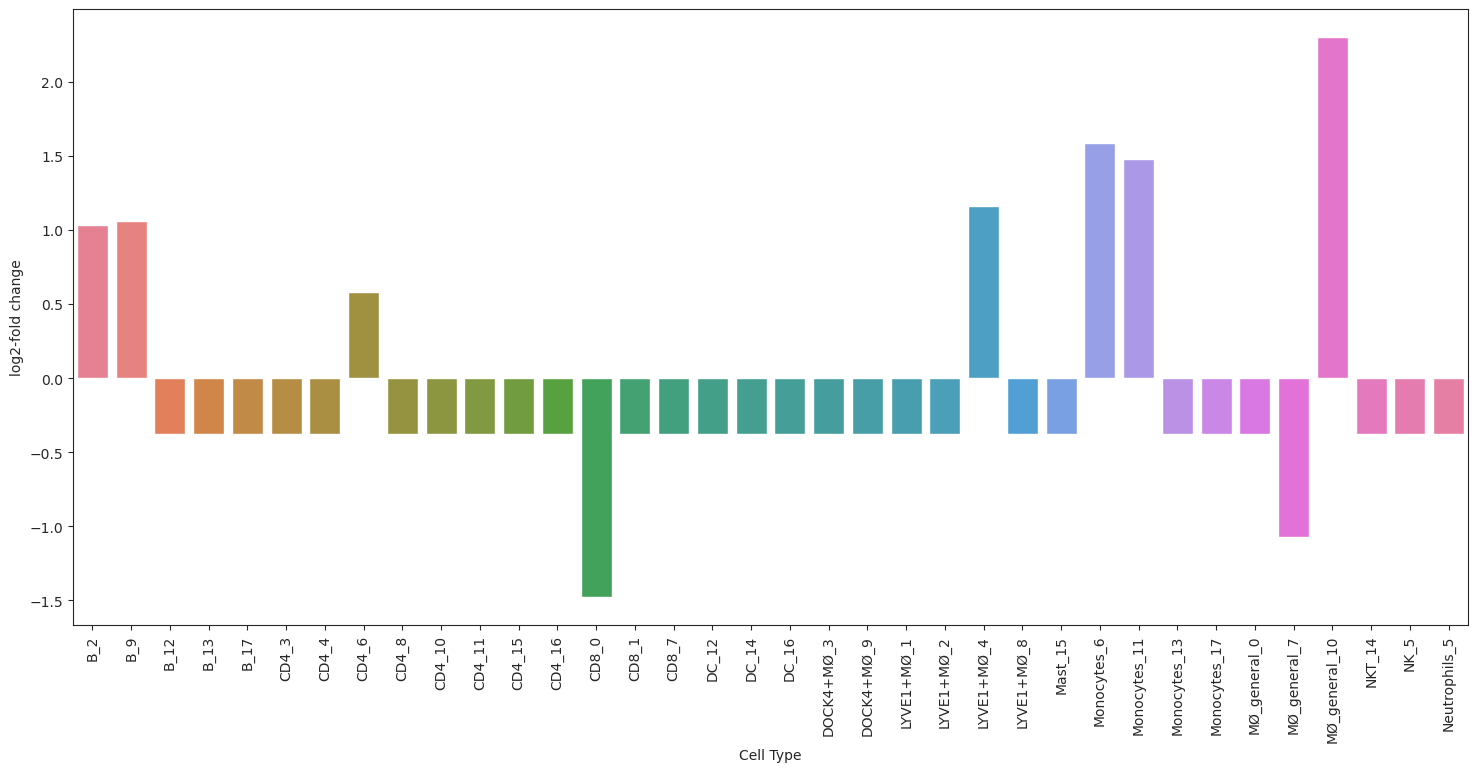

In [23]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_noninf]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.show()

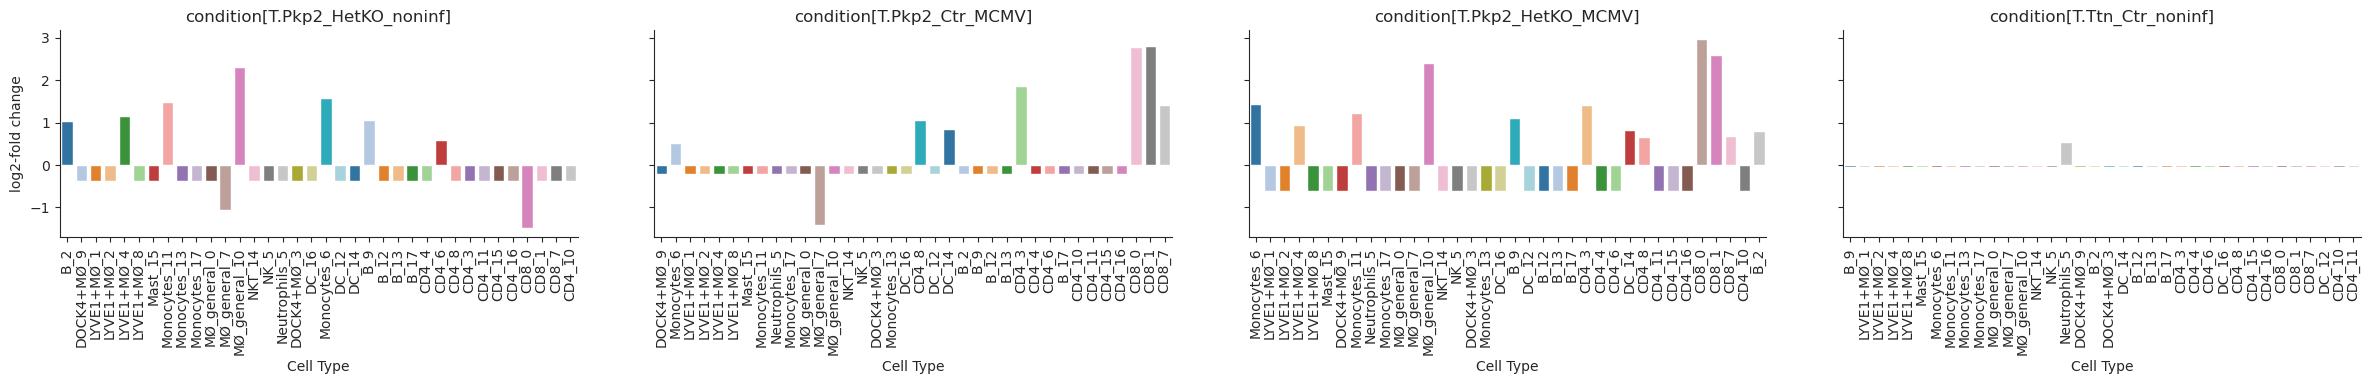

In [24]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "condition")
plt.show()